In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt


In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2021, 12, 31)
data = web.DataReader('0050.TW', "yahoo", start, end)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,56.650002,56.049999,56.450001,56.500000,20069,56.500000
2010-01-05,56.900002,56.150002,56.799999,56.500000,16430,56.500000
2010-01-06,57.750000,56.500000,56.500000,57.549999,18953,57.549999
2010-01-07,58.150002,57.299999,57.599998,57.400002,14101,57.400002
2010-01-08,57.750000,57.049999,57.299999,57.750000,11324,57.750000


In [4]:
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))

In [5]:
from tools import technical_generator
Generator = technical_generator.Generator()

In [6]:
data['7ma'] = Generator.EMA(data['Close'], 7)
data['14ma'] = Generator.EMA(data['Close'], 14)
data['21ma'] = Generator.EMA(data['Close'], 21)
data['7macd'] = Generator.MACD(data['Close'], 3, 11, 7)
data['14macd'] = Generator.MACD(data['Close'], 7, 21, 14)
data['7rsi'] = Generator.RSI(data['Close'], 7)
data['14rsi'] = Generator.RSI(data['Close'], 14)
data['21rsi'] = Generator.RSI(data['Close'], 21)
data['7atr'] = Generator.atr(data['High'], data['Low'], 7)
data['14atr'] = Generator.atr(data['High'], data['Low'], 14)
data['21atr'] = Generator.atr(data['High'], data['Low'], 21)
data['7upper'], data['7lower'] = Generator.bollinger_band(data['Close'], 7)
data['14upper'], data['14lower'] = Generator.bollinger_band(data['Close'], 14)
data['21upper'], data['21lower'] = Generator.bollinger_band(data['Close'], 21)
data['7rsv'] = Generator.rsv(data['Close'], 7)
data['14rsv'] = Generator.rsv(data['Close'], 14)
data['21rsv'] = Generator.rsv(data['Close'], 21)


In [7]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_change,7ma,14ma,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,56.650002,56.049999,56.450001,56.500000,20069,56.500000,NaN,NaN,56.500000,56.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,56.900002,56.150002,56.799999,56.500000,16430,56.500000,0.000000,0.000000,56.500000,56.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,57.750000,56.500000,56.500000,57.549999,18953,57.549999,0.018584,0.018413,56.954054,56.901103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,58.150002,57.299999,57.599998,57.400002,14101,57.400002,-0.002606,-0.002610,57.117143,57.053730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,57.750000,57.049999,57.299999,57.750000,11324,57.750000,0.006098,0.006079,57.324584,57.235386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
other_data = pd.read_csv('./assets/other_data.csv', index_col = 'Date', parse_dates = True)
other_data.head()

,AAPL,MTK,GUC,Xintec,Qualcomm,SamSung,Broadcom,VIX,USD,CNY,...,NASDQ,dealer_buy,dealer_sell,dealer_dif,investment_buy,investment_sell,investment_dif,foreign_buy,foreign_sell,foreign_dif
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,6.97,507.84,142.0,28.43,37.43,15100,16.80,25.40,32.06,0.15,...,2147.87,3161497580,2968407011,193090569,3102476560,1648311871,1454164689,1.551380e+10,2.549564e+10,-9981838210
2010-02-22,7.16,518.63,141.0,28.43,39.01,15460,17.35,19.94,32.00,0.15,...,2242.03,3133892869,2444166818,689726051,2130761100,1359109401,771651699,2.846749e+10,2.503619e+10,3431302085
2010-02-23,7.04,523.53,143.5,28.43,38.54,15340,17.38,21.37,32.06,0.15,...,2213.44,2000150200,2287498353,-287348153,2263043520,2650742656,-387699136,2.422218e+10,2.360860e+10,613580581
2010-02-24,7.17,517.65,146.5,28.43,37.87,15040,17.74,20.27,32.02,0.15,...,2235.90,2043898760,1998239251,45659509,2258613250,1775532693,483080557,2.027639e+10,2.546846e+10,-5192069643
2010-02-25,7.21,497.06,143.0,28.43,37.18,14720,18.09,20.10,32.04,0.15,...,2234.22,1728179056,3572176638,-1843997582,1801497370,2286138110,-484640740,2.259238e+10,3.143820e+10,-8845826819


In [18]:
other_data.index

DatetimeIndex(['2010-02-10', '2010-02-22', '2010-02-23', '2010-02-24',
               '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02',
               '2010-03-03', '2010-03-04',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29'],
              dtype='datetime64[ns]', name='Date', length=2906, freq=None)

In [19]:
data_combine = data.merge(other_data, how = 'left', left_index = True, right_index = True)
data_combine

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_change,7ma,14ma,...,NASDQ,dealer_buy,dealer_sell,dealer_dif,investment_buy,investment_sell,investment_dif,foreign_buy,foreign_sell,foreign_dif
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,56.650002,56.049999,56.450001,56.500000,20069,56.500000,NaN,NaN,56.500000,56.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,56.900002,56.150002,56.799999,56.500000,16430,56.500000,0.000000,0.000000,56.500000,56.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,57.750000,56.500000,56.500000,57.549999,18953,57.549999,0.018584,0.018413,56.954054,56.901103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,58.150002,57.299999,57.599998,57.400002,14101,57.400002,-0.002606,-0.002610,57.117143,57.053730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,57.750000,57.049999,57.299999,57.750000,11324,57.750000,0.006098,0.006079,57.324584,57.235386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,143.600006,142.949997,143.000000,143.050003,12525381,143.050003,0.002804,0.002800,142.101747,141.686840,...,15653.37,7.654187e+09,6.711416e+09,9.427717e+08,2.817694e+09,3.380377e+09,-5.626823e+08,5.232482e+10,4.372264e+10,8.602180e+09
2021-12-27,144.250000,143.100006,143.199997,144.149994,6512199,144.149994,0.007690,0.007660,142.613809,142.015261,...,15871.26,7.715526e+09,6.332401e+09,1.383125e+09,1.232269e+09,2.565483e+09,-1.333214e+09,5.322526e+10,4.213732e+10,1.108794e+10
2021-12-28,145.300003,144.300003,144.300003,145.300003,22455995,145.300003,0.007978,0.007946,143.285358,142.453226,...,15781.72,8.558901e+09,6.831746e+09,1.727155e+09,2.205393e+09,1.660451e+09,5.449424e+08,6.966452e+10,4.810975e+10,2.155477e+10


In [20]:
data_combine = data_combine.dropna()
data_combine.head()

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_change,7ma,14ma,...,NASDQ,dealer_buy,dealer_sell,dealer_dif,investment_buy,investment_sell,investment_dif,foreign_buy,foreign_sell,foreign_dif
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,52.250000,51.700001,51.950001,52.099998,11219,52.099998,0.010669,0.010613,51.943241,52.708595,...,2147.87,3.161498e+09,2.968407e+09,1.930906e+08,3.102477e+09,1.648312e+09,1.454165e+09,1.551380e+10,2.549564e+10,-9.981838e+09
2010-02-22,53.150002,52.599998,53.049999,52.599998,11187,52.599998,0.009597,0.009551,52.107470,52.693884,...,2242.03,3.133893e+09,2.444167e+09,6.897261e+08,2.130761e+09,1.359109e+09,7.716517e+08,2.846749e+10,2.503619e+10,3.431302e+09
2010-02-23,52.750000,52.200001,52.599998,52.599998,9571,52.599998,0.000000,0.000000,52.230624,52.681192,...,2213.44,2.000150e+09,2.287498e+09,-2.873482e+08,2.263044e+09,2.650743e+09,-3.876991e+08,2.422218e+10,2.360860e+10,6.135806e+08
2010-02-24,52.549999,52.150002,52.150002,52.250000,11026,52.250000,-0.006654,-0.006676,52.235469,52.623011,...,2235.90,2.043899e+09,1.998239e+09,4.565951e+07,2.258613e+09,1.775533e+09,4.830806e+08,2.027639e+10,2.546846e+10,-5.192070e+09
2010-02-25,52.299999,51.349998,52.250000,51.650002,20361,51.650002,-0.011483,-0.011550,52.089087,52.491931,...,2234.22,1.728179e+09,3.572177e+09,-1.843998e+09,1.801497e+09,2.286138e+09,-4.846407e+08,2.259238e+10,3.143820e+10,-8.845827e+09


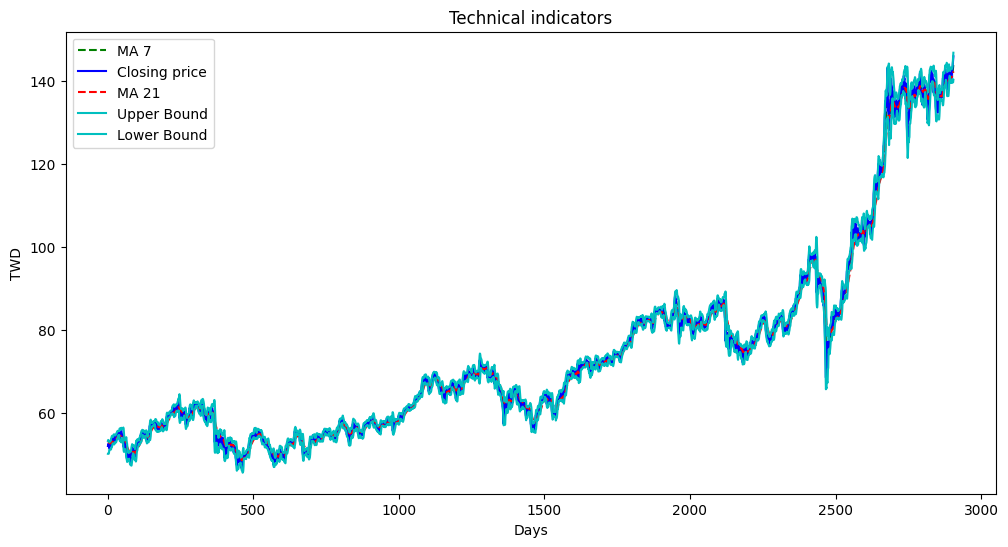

In [26]:
x_ = np.arange(data_combine.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data_combine['7ma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(data_combine['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data_combine['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(data_combine['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(data_combine['7lower'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, data_combine['7lower'].values, data_combine['7upper'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend()


C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_17448/1637824849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
c:\Python\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_17448/1637824849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine[f'FT_{num_}components'] = np.fft

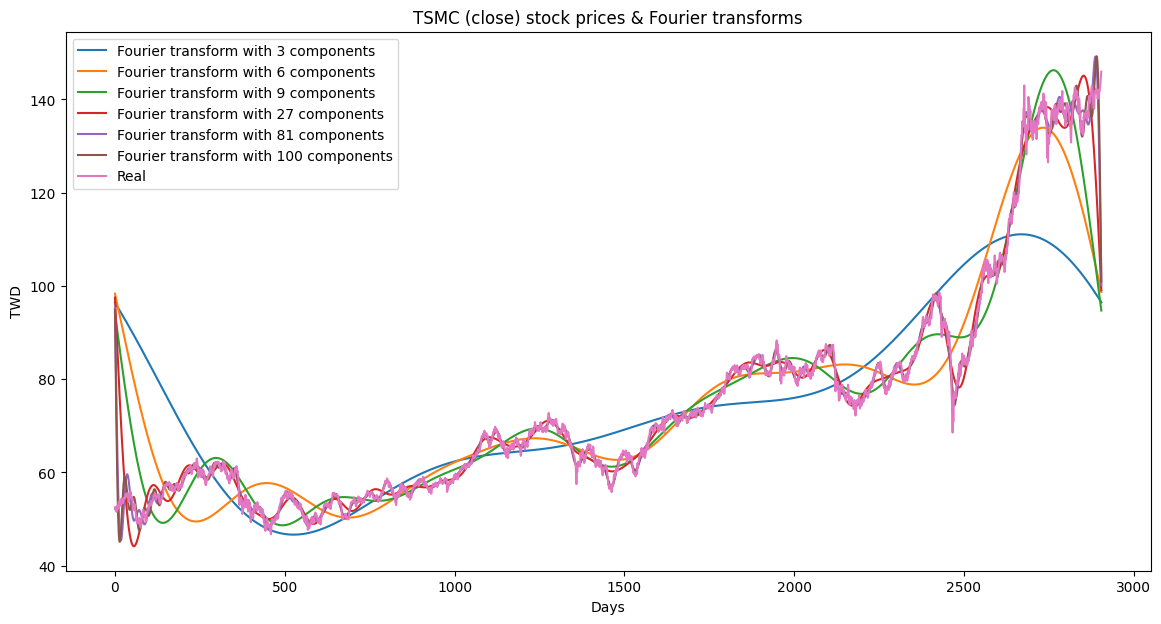

In [28]:
close_fft = np.fft.fft(np.asarray(data_combine['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_combine['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('TWD')
plt.title('TSMC (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [29]:
data_combine['FT_3components'] = data_combine['FT_3components'].astype('float')
data_combine['FT_6components'] = data_combine['FT_6components'].astype('float')
data_combine['FT_9components'] = data_combine['FT_9components'].astype('float')
data_combine['FT_27components'] = data_combine['FT_27components'].astype('float')
data_combine['FT_81components'] = data_combine['FT_81components'].astype('float')
data_combine['FT_100components'] = data_combine['FT_100components'].astype('float')
data_combine.head()

c:\Python\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_17448/923273204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine['FT_3components'] = data_combine['FT_3components'].astype('float')
C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_17448/923273204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine['FT_6components

,High,Low,Open,Close,Volume,Adj Close,pct_change,log_change,7ma,14ma,...,investment_dif,foreign_buy,foreign_sell,foreign_dif,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-10,52.250000,51.700001,51.950001,52.099998,11219,52.099998,0.010669,0.010613,51.943241,52.708595,...,1.454165e+09,1.551380e+10,2.549564e+10,-9.981838e+09,96.358920,98.341083,94.157682,97.504515,95.290389,94.816094
2010-02-22,53.150002,52.599998,53.049999,52.599998,11187,52.599998,0.009597,0.009551,52.107470,52.693884,...,7.716517e+08,2.846749e+10,2.503619e+10,3.431302e+09,96.242195,98.002049,93.597325,95.929373,90.414471,88.712660
2010-02-23,52.750000,52.200001,52.599998,52.599998,9571,52.599998,0.000000,0.000000,52.230624,52.681192,...,-3.876991e+08,2.422218e+10,2.360860e+10,6.135806e+08,96.125140,97.662731,93.037830,94.352361,85.604138,82.741271
2010-02-24,52.549999,52.150002,52.150002,52.250000,11026,52.250000,-0.006654,-0.006676,52.235469,52.623011,...,4.830806e+08,2.027639e+10,2.546846e+10,-5.192070e+09,96.007757,97.323153,92.479275,92.775246,80.907607,76.994296
2010-02-25,52.299999,51.349998,52.250000,51.650002,20361,51.650002,-0.011483,-0.011550,52.089087,52.491931,...,-4.846407e+08,2.259238e+10,3.143820e+10,-8.845827e+09,95.890048,96.983341,91.921743,91.199799,76.371194,71.557895


In [30]:
data_combine.to_csv('./assets/data.csv')